# **HW 2**

In [98]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from keras.datasets import mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelBinarizer


from plotnine import *

from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, r2_score

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv

import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
boston_housing = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Exploratory Analysis

Median home value is the variable we want to predict, so performing exploratory analysis will provide better insight of the data before performing models.

In [100]:
avg_median_value = boston_housing["medv"].mean()
print("The average median home value in Boston is", (avg_median_value*1000).round(2), "dollars.")
print("The range of median values of homes is", boston_housing["medv"].min()*1000, "to", boston_housing["medv"].max()*1000, "dollars")

The average median home value in Boston is 22532.81 dollars.
The range of median values of homes is 5000.0 to 50000.0 dollars


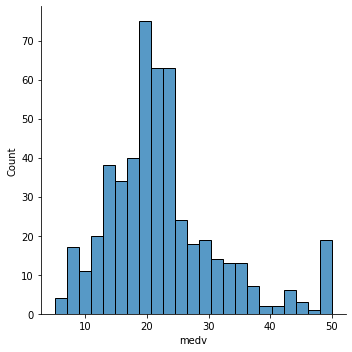

In [101]:
sns.displot(boston_housing, x="medv")

A majority of the houses' median values range between 14,000 and 24,000.

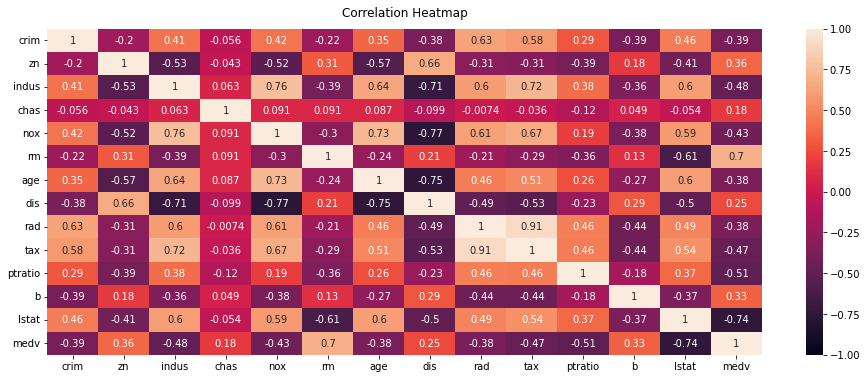

In [102]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(boston_housing.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The three most impactful relational variables with median home value are:


1.   LSTAT - % lower status of the population (-0.74)
2.   RM - average number of rooms per dwelling (0.7)
3.   PTRATIO - pupil-teacher ratio by town (-0.51)

# Model

In [103]:
feats = ["crim", "zn",	"indus",	"chas",	"nox",	"rm",	"age",	"dis",	"rad",	"tax",	"ptratio",	"b",	"lstat"]
predict = ["medv"]

X = boston_housing[feats]
y = boston_housing[predict]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()
continuous = ["crim", "zn",	"indus", "nox",	"rm",	"age",	"dis",	"rad",	"tax",	"ptratio",	"b",	"lstat"]
X_train[continuous] = z.fit_transform(X_train[continuous])
X_test[continuous] = z.transform(X_test[continuous])

In [105]:
model = kb.Sequential([
    kb.layers.Dense(1000, input_shape =[13]), #input
    kb.layers.Dense(800, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(650, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(500, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(450, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(350, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(225, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(100, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(50, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(30, kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(10,kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(8,kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(6,kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(4,kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(3,kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(2,kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(1, activation = "relu") #output
])

# compile model
model.compile(loss="mean_squared_error", optimizer=kb.optimizers.SGD(0.001),
	metrics= ["mean_absolute_error"])

#fit the model (same as SKlearn)
model.fit(X_train,y_train, epochs = 200, validation_data=(X_test, y_test))

Epoch 1/200
13/13 [==============================] - 6s 112ms/step - loss: 1301.0841 - mean_absolute_error: 22.1277 - val_loss: 1146.4285 - val_mean_absolute_error: 19.0756
Epoch 2/200
13/13 [==============================] - 1s 55ms/step - loss: 1223.8778 - mean_absolute_error: 20.6943 - val_loss: 962.9137 - val_mean_absolute_error: 14.3053
Epoch 3/200
13/13 [==============================] - 1s 54ms/step - loss: 1087.8243 - mean_absolute_error: 17.6350 - val_loss: 874.5158 - val_mean_absolute_error: 10.5532
Epoch 4/200
13/13 [==============================] - 1s 41ms/step - loss: 921.6546 - mean_absolute_error: 12.5826 - val_loss: 892.4055 - val_mean_absolute_error: 10.3584
Epoch 5/200
13/13 [==============================] - 0s 36ms/step - loss: 824.2711 - mean_absolute_error: 7.9967 - val_loss: 2040.9359 - val_mean_absolute_error: 28.8822
Epoch 6/200
13/13 [==============================] - 1s 41ms/step - loss: 780.9302 - mean_absolute_error: 5.8193 - val_loss: 1781.4882 - val_mean

In [106]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_227 (Dense)           (None, 1000)              14000     
                                                                 
 dense_228 (Dense)           (None, 800)               800800    
                                                                 
 batch_normalization_199 (Ba  (None, 800)              3200      
 tchNormalization)                                               
                                                                 
 dense_229 (Dense)           (None, 650)               520650    
                                                                 
 batch_normalization_200 (Ba  (None, 650)              2600      
 tchNormalization)                                               
                                                                 
 dense_230 (Dense)           (None, 500)             

In [107]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

4/4 [==============================] - 0s 7ms/step


In [108]:
print("MSE Train", mean_squared_error(y_train, y_pred_train))
print("MSE Test", mean_squared_error(y_test, y_pred_test))
print(" ")
print("MAE Train", mean_absolute_error(y_train, y_pred_train))
print("MAE Test", mean_absolute_error(y_test, y_pred_test))

MSE Train 21.99863175973955
MSE Test 23.788568009691932
 
MAE Train 3.2140399738703618
MAE Test 3.5219779809316
